In [75]:

import pandas as pd
import numpy as np
from numpy import math
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
%matplotlib inline

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [54]:


# Load the dataset
df = pd.read_csv(r'SMP.csv' )
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [55]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [56]:
df.shape

(2035, 8)

In [57]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [58]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [ ]:
df.dtypes

Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


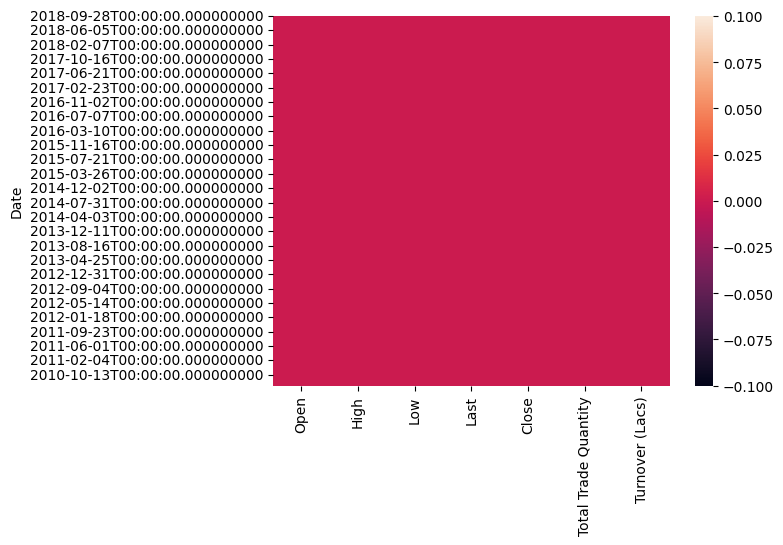

In [ ]:
sns.heatmap(df.isnull())
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


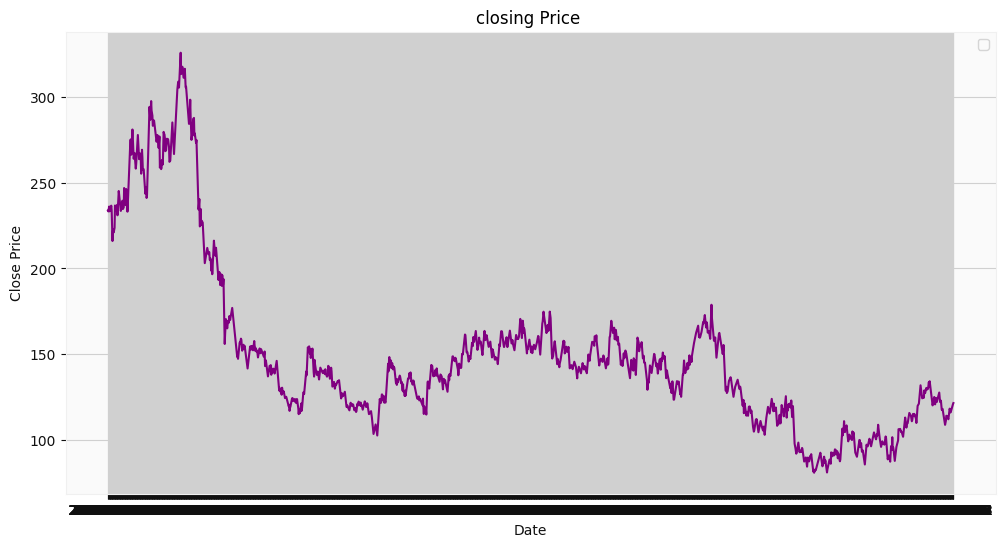

In [74]:
# Visualize stock CLOSING prices 
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Close'], color='purple')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('closing Price ')
plt.legend()
plt.show()

c:\Users\HP COMPUTER.S\AppData\Local\Programs\Python\Python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


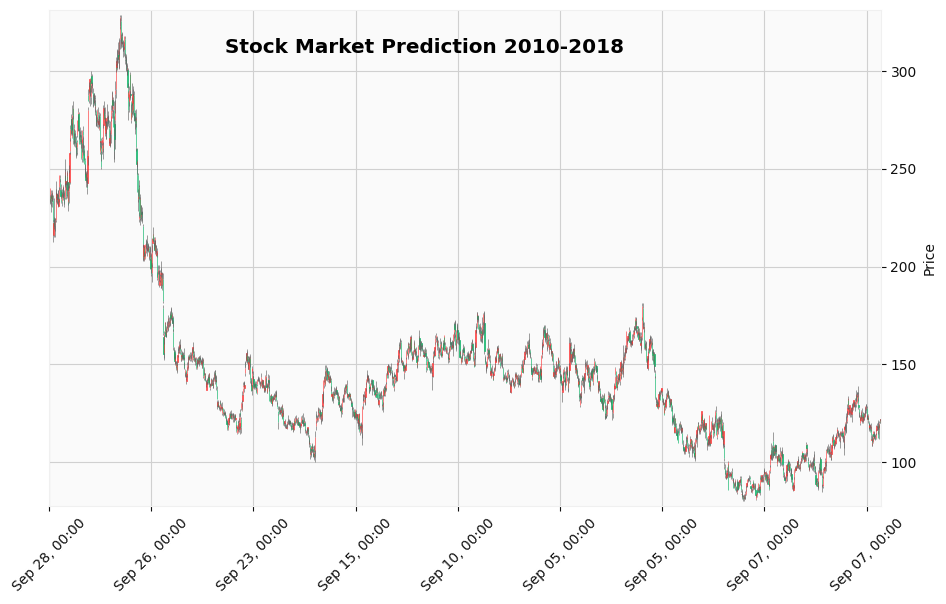

In [73]:

df = df.set_index(pd.DatetimeIndex(df['Date']))

# Plot the candlestick chart
mpf.plot(df, figratio=(20,12), type="candle", title="Stock Market Prediction 2010-2018", tight_layout=True, style='yahoo')

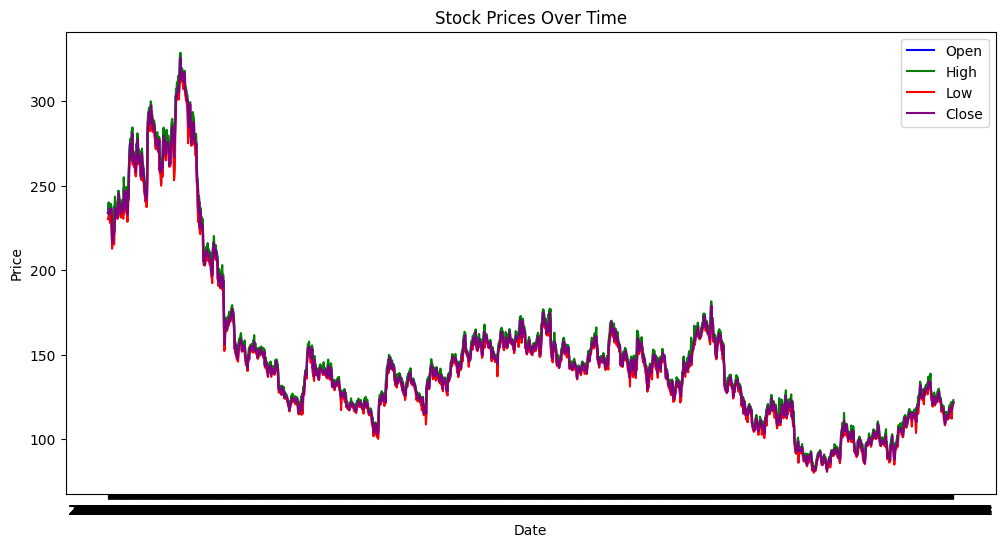

In [61]:
# Visualize stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()

plt.show()

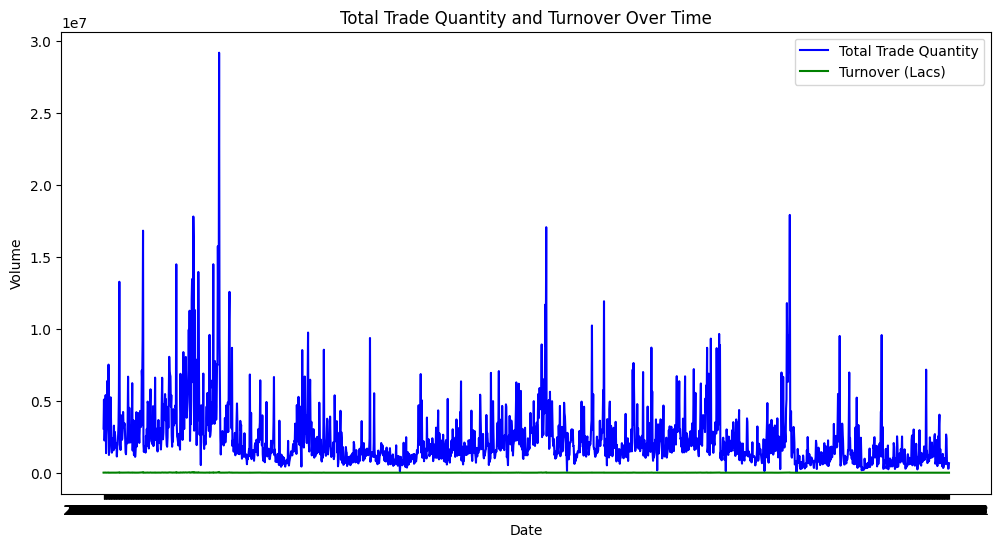

In [62]:
# Visualize Total Trade Quantity and Turnover
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total Trade Quantity'], label='Total Trade Quantity', color='blue')
plt.plot(df['Date'], df['Turnover (Lacs)'], label='Turnover (Lacs)', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Total Trade Quantity and Turnover Over Time')
plt.legend()

plt.show()

In [ ]:
df.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
919,2015-01-13,157.55,157.90,154.20,155.40,155.25,1558189,2417.14
1703,2011-11-17,84.00,85.45,81.20,82.40,82.50,1062728,887.56
602,2016-04-28,122.50,123.50,120.00,120.40,120.30,2142054,2587.18
1638,2012-02-17,121.45,122.85,118.20,119.05,119.20,1751459,2106.43
1155,2014-01-23,149.05,150.35,147.50,148.10,148.20,1191923,1769.79
231,2017-10-25,211.00,211.50,203.00,205.00,205.30,2640192,5437.31
1474,2012-10-12,160.10,163.45,159.95,161.00,161.25,2721618,4400.32
576,2016-06-03,120.95,122.10,119.70,120.35,120.20,1783456,2152.68
179,2018-01-08,314.65,319.20,312.20,317.45,317.60,2171903,6855.32
485,2016-10-18,150.95,152.70,150.75,151.40,151.90,2736835,4153.10


In [ ]:
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [ ]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


<Axes: >

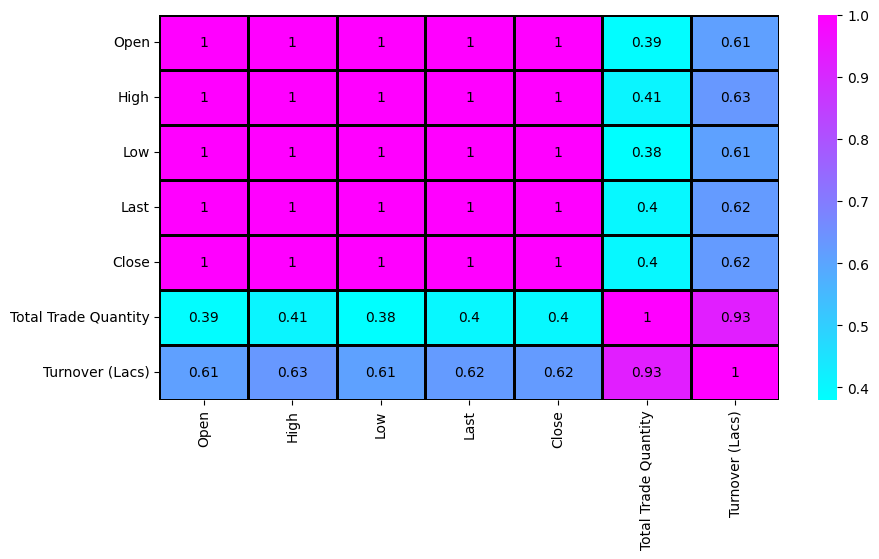

In [ ]:
import seaborn as sns
#correlation with heatmap
plt.figure(figsize=(10,5))
col={'color':'k','fontsize':10}
sns.heatmap(df.corr(),annot=True,cmap='cool',annot_kws=col,linewidth=1,linecolor='k')

In [ ]:
df.fillna(df.mean(), inplace=True)

duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicates_count} duplicate rows removed.")
    

In [ ]:
#Train-test split
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]


In [ ]:
#Data scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [ ]:
 #Prepare the input sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # You can experiment with different sequence lengths
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

In [ ]:
#Build the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(X_train.shape[2]))  # Number of features (output dimension)
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
#Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)
#Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_inv = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)
test_pred_inv = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)


Epoch 1/50
23/23 [==============================] - 10s 90ms/step - loss: 0.0216 - val_loss: 0.0022
Epoch 2/50
23/23 [==============================] - 1s 22ms/step - loss: 0.0032 - val_loss: 8.8161e-04
Epoch 3/50
23/23 [==============================] - 1s 22ms/step - loss: 0.0022 - val_loss: 8.6386e-04
Epoch 4/50
23/23 [==============================] - 1s 26ms/step - loss: 0.0021 - val_loss: 9.5379e-04
Epoch 5/50
23/23 [==============================] - 1s 28ms/step - loss: 0.0020 - val_loss: 8.8634e-04
Epoch 6/50
23/23 [==============================] - 1s 24ms/step - loss: 0.0021 - val_loss: 9.7928e-04
Epoch 7/50
23/23 [==============================] - 1s 23ms/step - loss: 0.0021 - val_loss: 9.3026e-04
Epoch 8/50
23/23 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 8.4431e-04
Epoch 9/50
23/23 [==============================] - 1s 29ms/step - loss: 0.0020 - val_loss: 8.9479e-04
Epoch 10/50
23/23 [==============================] - 1s 28ms/step - loss: 0.

In [ ]:

from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_pred_inv))

# Calculate the RMSE for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_pred_inv))

# Print the results
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Train RMSE: 661059.7921455977
Test RMSE: 569455.9303235083


In [83]:

# Print the results or perform further analysis
print("Train Predictions:", train_pred_inv)


Train Predictions: [[2.33528793e+02 2.35651718e+02 2.25734482e+02 ... 2.24563217e+02
  4.00506550e+06 1.06718613e+04]
 [2.28453430e+02 2.30551437e+02 2.20459885e+02 ... 2.19917374e+02
  4.25164550e+06 1.11924336e+04]
 [2.24708359e+02 2.26587952e+02 2.17674866e+02 ... 2.17190643e+02
  4.20611150e+06 1.07326885e+04]
 ...
 [1.20080345e+02 1.21588676e+02 1.18004715e+02 ... 1.18157013e+02
  1.65423362e+06 1.88900098e+03]
 [1.19743225e+02 1.21297501e+02 1.17507393e+02 ... 1.17821083e+02
  1.62012950e+06 1.91595520e+03]
 [1.19321152e+02 1.20828613e+02 1.16885521e+02 ... 1.17239319e+02
  1.62778600e+06 2.00519165e+03]]


In [84]:
print("Test Predictions:", test_pred_inv)

Test Predictions: [[1.20220856e+02 1.22120857e+02 1.18429001e+02 ... 1.18161514e+02
  2.40369250e+06 3.21702954e+03]
 [1.20958038e+02 1.22692932e+02 1.19207901e+02 ... 1.18965355e+02
  2.27780050e+06 2.87946240e+03]
 [1.21519539e+02 1.23213707e+02 1.19653839e+02 ... 1.19489624e+02
  2.19963325e+06 2.73213989e+03]
 ...
 [1.18970963e+02 1.20477585e+02 1.16926407e+02 ... 1.17686653e+02
  1.20729888e+06 1.34398511e+03]
 [1.19764870e+02 1.21238007e+02 1.17819962e+02 ... 1.18581566e+02
  1.13909375e+06 1.18035217e+03]
 [1.20609467e+02 1.22080856e+02 1.18660652e+02 ... 1.19463875e+02
  1.06738325e+06 1.04373779e+03]]


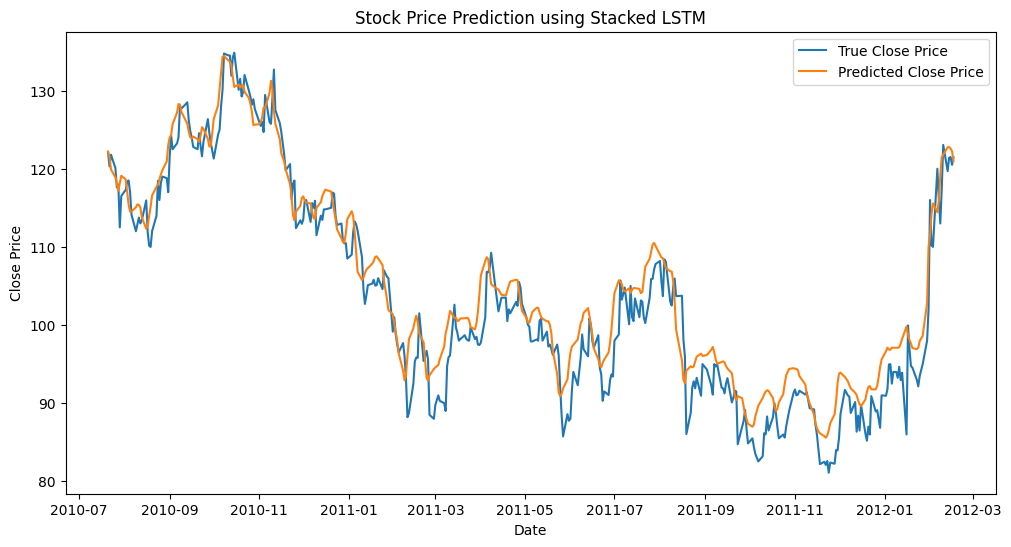

In [ ]:
# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_inv):], y_test_inv[:, 0], label='True Close Price')
plt.plot(df.index[-len(y_test_inv):], test_pred_inv[:, 0], label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using Stacked LSTM')
plt.legend()
plt.show()